<h1>Implementation of a Simple Neural Network with Exponential Weighted Average (EWA) for Training Loss</h1>

## Step 1: Import Libraries


In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

<p>Synthetic Data: We generate 1000 samples with 2 features each.
Labels: Binary labels are created by summing the features and setting the label to 1 if the sum is greater than 1, otherwise 0.</p>

# Generate Synthetic Data

In [2]:
# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (np.sum(X, axis=1) > 1).astype(int).reshape(-1, 1)

Network Structure:
Input Layer: 2 neurons (corresponding to 2 features).
<br>Hidden Layer: 10 neurons.
<br>Output Layer: 1 neuron (binary classification).
<br>Hyperparameters:
<br>Learning Rate: 0.1.
<br>Epochs: 50 (number of iterations over the entire dataset).


In [3]:
# Define the neural network structure
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.1
epochs = 50

In [4]:
# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [5]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [6]:
# Function to compute binary cross-entropy loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


In [7]:
def exponential_weighted_average(data, beta):
    v = 0
    ewa_values = []
    for x in data:
        v = beta * v + (1 - beta) * x
        ewa_values.append(v)
    return ewa_values

In [8]:
# Training loop
training_loss = []
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_hat = sigmoid(Z2)
     # Compute loss
    loss = compute_loss(y, y_hat)
    training_loss.append(loss)

    # Backward propagation
    m = X.shape[0]
    dZ2 = y_hat - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

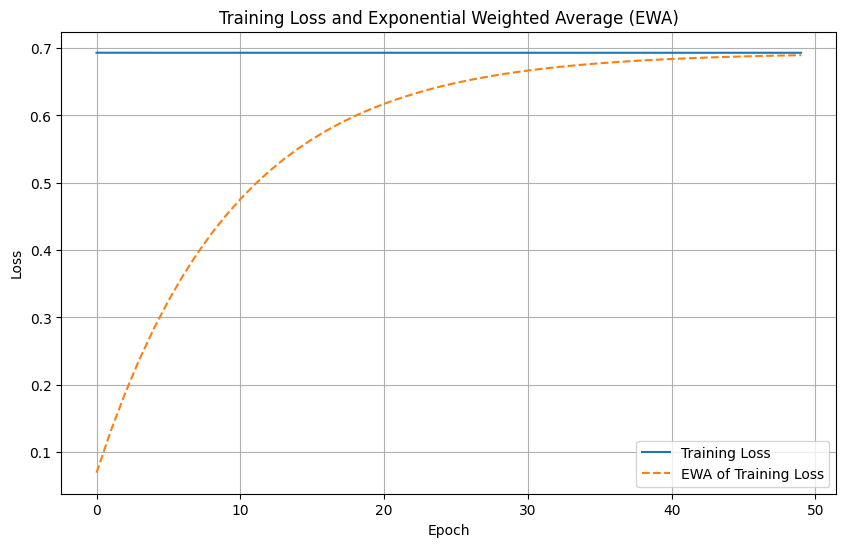

In [9]:
# Compute EWA for the training loss
beta = 0.9
ewa_training_loss = exponential_weighted_average(training_loss, beta)

# Plotting the training loss and its EWA
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(ewa_training_loss, label='EWA of Training Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss and Exponential Weighted Average (EWA)')
plt.legend()
plt.grid(True)
plt.show()